In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scienceplots
import tqdm

plt.style.use(['science', 'grid', 'notebook'])

# Ejercicio 3

Funciones que definen la generacio2n de datos, la arquitectura de la red y el entrenamiento

In [2]:
fun = lambda x: 4*x *(1-x)

def data_generator(n_data_train, n_data_val, n_data_test, f=fun):
    # train
    x_train = np.random.uniform(0,1, n_data_train)
    y_train = f(x_train)
    # validation
    x_val = np.random.uniform(0,1, n_data_val)
    y_val = f(x_val)
    # test
    x_test = np.random.uniform(0,1, n_data_test)
    y_test = f(x_test)

    return (x_train, y_train, x_val, y_val, x_test, y_test)

def begin(input_shape, hidden_dim, activation_hidden, activation_output='linear'):
    inputs = tf.keras.layers.Input(shape=(input_shape,), name='Input')
    hidden = tf.keras.layers.Dense(hidden_dim, activation=activation_hidden)(inputs)
    merge = tf.keras.layers.concatenate([inputs, hidden], axis=-1)
    predictions = tf.keras.layers.Dense(1, activation=activation_output)(merge)

    model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

    print(model.summary())

    return model

def train(model, x_train, y_train, x_val, y_val, x_test, y_test, lr, epochs, batch_size, fun_loss='mse', metrics=['mse'], verbose=True, shuffle=False):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=fun_loss,  # Error cuadrático medio
              metrics=metrics)
    
    
    history=model.fit(x=x_train, y=y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=shuffle,
                validation_data=(x_val, y_val), verbose=verbose)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)

    y_pred = model.predict(x_test)

    return history, test_loss, test_acc, y_pred

Seteo de constantes y funciones de activación

In [29]:
seed=32                           # for reproducibility 
np.random.seed(seed)
tf.random.set_seed(seed)

# activation_hidden = lambda x: 1/(1+tf.math.exp(-x))
activation_hidden = 'sigmoid'

hidden_dim = 5
input_shape = 1
lr = 0.1

# cantidad de datos para entrenamiento, validation y test
n_train = np.array([5, 10, 100], dtype=np.int64)
n_val = n_train
n_test = 20 * np.ones_like(n_train)

In [68]:
epochs = 500

# Inicializar estructuras para guardar las historias y resultados de prueba
histories = np.empty(len(n_train), dtype=object)
test_losses = np.empty(len(n_train), dtype=object)
test_acc = np.empty(len(n_train), dtype=object)
y_pred = np.empty(len(n_train), dtype=object)
y_trues = np.empty(len(n_train), dtype=object)

# Analizo para diferentes conjuntos de datos
for i, (n_t, n_v, n_tt) in enumerate(zip(n_train, n_val, n_test)):
    data = data_generator(n_t, n_v, n_tt)   # data para el modelo
    model = begin(input_shape, hidden_dim, activation_hidden)
    
    # Entrenar el modelo y guardar la historia y resultados de prueba
    history, test_loss, test_ac, y_p = train(model, *data, lr, epochs, batch_size=n_t//2)
    
    # Almacenar la historia de entrenamiento, la pérdida de prueba y la precisión de prueba
    histories[i] = history
    test_losses[i] = test_loss
    test_acc[i] = test_ac
    y_pred[i] = y_p
    y_trues[i] = data[5]

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 5)         │         10 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_24      │ (None, 6)         │          0 │ Input[0][0],      │
│ (Concatenate)       │                   │            │ dense_48[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 1)         │          7 │ concatenate_24[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.0967 - mse: 1.0967 - val_loss: 0.1081 - val_mse: 0.1081
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1491 - mse: 0.1491 - val_loss: 0.4458 - val_mse: 0.4458
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3556 - mse: 0.3556 - val_loss: 0.1613 - val_mse: 0.1613
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0840 - mse: 0.0840 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.1458 - val_mse: 0.1458
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1693 - mse: 0.1693 - val_loss: 0.1057 - val_mse: 0.1057
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1032 - mse: 0.1032 - val_loss: 0.0589 - val_mse: 0.0589
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0871 - val_mse: 0.0871
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0638 - mse: 0.0

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 5)         │         10 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_25      │ (None, 6)         │          0 │ Input[0][0],      │
│ (Concatenate)       │                   │            │ dense_50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 1)         │          7 │ concatenate_25[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.4847 - mse: 1.4847 - val_loss: 0.1367 - val_mse: 0.1367
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1537 - mse: 0.1537 - val_loss: 0.4278 - val_mse: 0.4278
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.8559 - val_mse: 0.8559
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4375 - mse: 0.4375 - val_loss: 0.6743 - val_mse: 0.6743
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2784 - mse: 0.2784 - val_loss: 0.3093 - val_mse: 0.3093
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.1156 - val_mse: 0.1156
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1275 - mse: 0.1275 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1799 - 

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 5)         │         10 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_26      │ (None, 6)         │          0 │ Input[0][0],      │
│ (Concatenate)       │                   │            │ dense_52[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 1)         │          7 │ concatenate_26[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8076 - mse: 0.8076 - val_loss: 0.0932 - val_mse: 0.0932
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1361 - mse: 0.1361 - val_loss: 0.4191 - val_mse: 0.4191
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4220 - mse: 0.4220 - val_loss: 0.3511 - val_mse: 0.3511
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3142 - mse: 0.3142 - val_loss: 0.1316 - val_mse: 0.1316
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1348 - mse: 0.1348 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1488 - mse: 0.1488 - val_loss: 0.1626 - val_mse: 0.1626
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2087 - mse: 0.2087 - val_loss: 0.1515 - val_mse: 0.1515
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.1016 - val_mse: 0.1016
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1191 - 

Test losses for n_train=5: 0.2985500395298004
Test accuracies for n_train=5: 0.2985500395298004
Test losses for n_train=10: 0.007519164588302374
Test accuracies for n_train=10: 0.007519164588302374
Test losses for n_train=100: 8.418878132943064e-05
Test accuracies for n_train=100: 8.418878132943064e-05


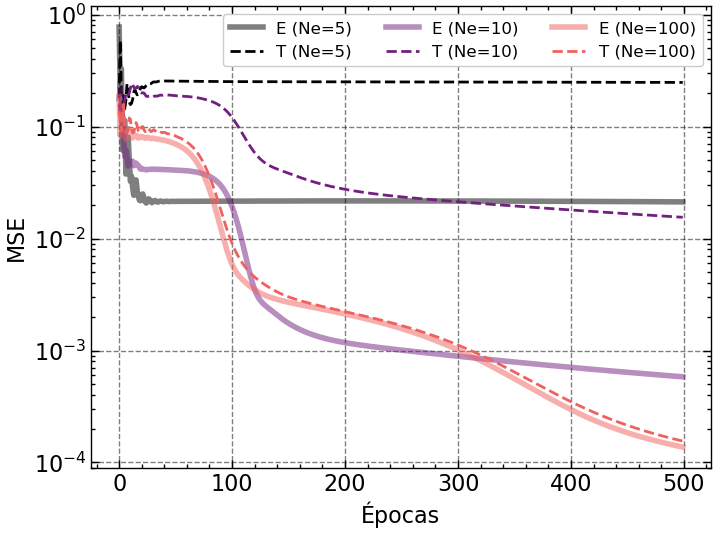

In [39]:
cm = cm = plt.get_cmap('magma')


for i in range(len(n_train)):
    plt.plot(histories[i].history['loss'], label=f'E (Ne={n_train[i]})', color=cm(i/len(n_train)), lw=4, alpha=0.5)
    plt.plot(histories[i].history['val_loss'], label=f'T (Ne={n_train[i]})', linestyle='--', color=cm(i/len(n_train)))

# plt.title('Loss vs Epochs')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.yscale('log')

plt.legend(fontsize=12, ncols=3)
# plt.savefig('../doc/figures/metrics_e3.pdf', dpi=500)

# Acceso a la precisión de prueba
for i in range(len(n_train)):
    print(f'Test losses for n_train={n_train[i]}: {test_losses[i]}')
    print(f'Test accuracies for n_train={n_train[i]}: {test_acc[i]}')


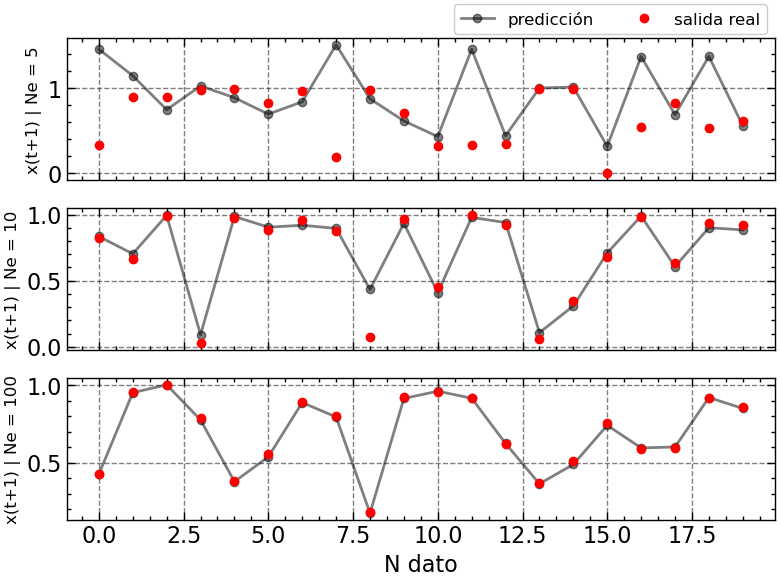

In [67]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

for i in range(len(y_pred)):
    ax[i].plot(y_pred[i], 'o-', color='black', alpha=0.5, label='predicción')
    ax[i].plot(y_trues[i], 'o', color='red', label='salida real')

    ax[i].set_ylabel(f'x(t+1) | Ne = {n_train[i]}', fontsize=12)

# Coloca la leyenda fuera del gráfico
ax[0].legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=2, fontsize=12)
ax[2].set_xlabel('N dato')
plt.tight_layout()

plt.savefig('../doc/figures/predicciones_e3.pdf', dpi=500)
